In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import statsmodels.api as smf

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B841-0E2D

 Directory of C:\Users\SANVI\Documents\ExelR Assignment\Forecasting

04-05-2022  04.09 PM    <DIR>          .
04-05-2022  04.09 PM    <DIR>          ..
04-05-2022  04.05 PM    <DIR>          .ipynb_checkpoints
20-04-2022  09.51 PM             9,559 Airlines+Data.xlsx
20-04-2022  09.51 PM             9,422 CocaCola_Sales_Rawdata.xlsx
04-05-2022  04.09 PM               916 forecasting_airlinedata.ipynb
20-04-2022  09.51 PM               233 Problem_statement.txt
               4 File(s)         20,130 bytes
               3 Dir(s)  101,387,522,048 bytes free


In [3]:
data = pd.read_excel('Airlines+Data.xlsx')

In [4]:
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<ipython-input-7-394c6fd88a18>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


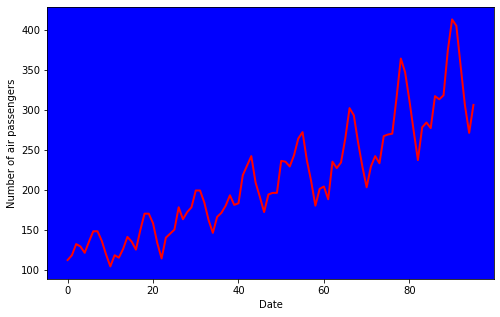

In [7]:
# Lineplot for Passengers
plt.figure(figsize=(8,5))
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
ax = plt.axes()
ax.set_facecolor("blue")
plt.plot(data['Passengers'], color = 'red', linewidth=2)

<AxesSubplot:ylabel='Density'>

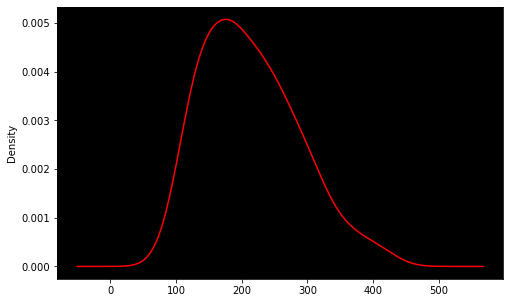

In [8]:
# Density Plot
ax = plt.axes()
ax.set_facecolor("black")
data['Passengers'].plot(kind = 'kde', figsize=(8,5), color = 'red')

In [9]:
# Data Driven Forecasting Methods

In [10]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [11]:
# Splitting data into Train and Test (77/33)
Train = data.head(84)
Test = data.tail(12)

In [12]:
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [13]:
# Moving Average Method

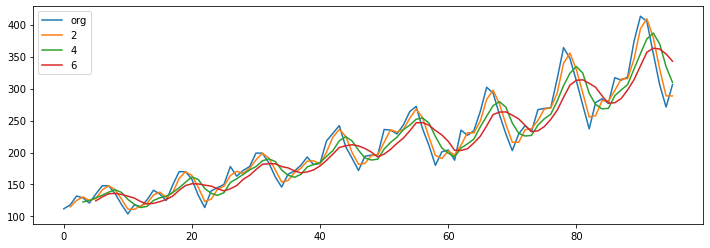

In [16]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
for i in range(2,8,2):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [17]:
# Time series decomposition plot

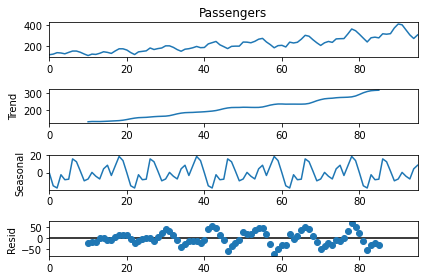

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data.Passengers, period=20)
decompose_ts_add.plot()
plt.show()

In [28]:
# Evaluation Metric RMSE
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org) - np.array(pred)) ** 2))
    return rmse

In [29]:
# Simple Exponential Method
import warnings
warnings.filterwarnings("ignore")

In [30]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Passengers, pred_ses)
rmse_ses_model

68.00674031349644

In [31]:
# Holt method
hw_model = Holt(Train["Passengers"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Passengers, pred_hw)
rmse_hw_model

58.57384693071804

In [32]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.Passengers, pred_hwe_add_add)
rmse_hwe_add_add_model

62.71406428068746

In [33]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(Test.Passengers, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

64.77748540879074

In [35]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method',rmse_hw_model],
          ['HW exp smoothing add',rmse_hwe_add_add_model],['HW exp smoothing mult',rmse_hwe_model_mul_add_model]]

In [36]:
list

[['Simple Exponential Method', 68.00674031349644],
 ['Holt method', 58.57384693071804],
 ['HW exp smoothing add', 62.71406428068746],
 ['HW exp smoothing mult', 64.77748540879074]]

In [37]:
## Model based Forecasting Methods

In [38]:
# Data preprocessing for models
data1 = data.copy()
data1.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [39]:
data1["t"] = np.arange(1,97)
data1["t_squared"] = data1["t"] * data1["t"]
data1["log_psngr"] = np.log(data1["Passengers"])

data1.head()

,Month,Passengers,t,t_squared,log_psngr
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791


In [40]:
# Splitting data into Train and Test (77/33)
Train = data1.head(84)
Test = data1.tail(12)

In [41]:
# Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Passengers'], pred_linear)
rmse_linear_model

53.199236534802715

In [42]:
# Exponential Model

Exp = smf.ols('log_psngr~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Passengers'], np.exp(pred_Exp))
rmse_Exp_model

46.0573611031562

In [43]:
# Quadratic Model
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Passengers'], pred_Quad)
rmse_Quad_model

48.051888979330975

In [55]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method',rmse_hw_model],
          ['HW exp smoothing add',rmse_hwe_add_add_model],['HW exp smoothing mult',rmse_hwe_model_mul_add_model],
          ['Linear Mode',rmse_linear_model],['Exp model',rmse_Exp_model],['Quad model',rmse_Quad_model]
        ]

In [56]:
df = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
df

,Model,RMSE_Value
0,Simple Exponential Method,68.006740
1,Holt method,58.573847
2,HW exp smoothing add,62.714064
3,HW exp smoothing mult,64.777485
4,Linear Mode,53.199237
5,Exp model,46.057361
6,Quad model,48.051889
